# SpaceX Falcon 9 First Stage Landing Prediction

## Assignment: Exploring and Preparing Data¶

### Import Libraries and Define Auxiliary Functions¶

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import pandas as pd
import io

## Exploratory Data Analysis

First, let's read the SpaceX dataset into a Pandas dataframe and print its summary



In [5]:
import requests
import pandas as pd
import io

# Define the URL
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

# Fetch the dataset
response = requests.get(URL)
dataset_part_2_csv = io.BytesIO(response.content)
df = pd.read_csv(dataset_part_2_csv)
df.head()


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the FlightNumber (indicating the continuous launch attempts.) and Payload variables would affect the launch outcome.

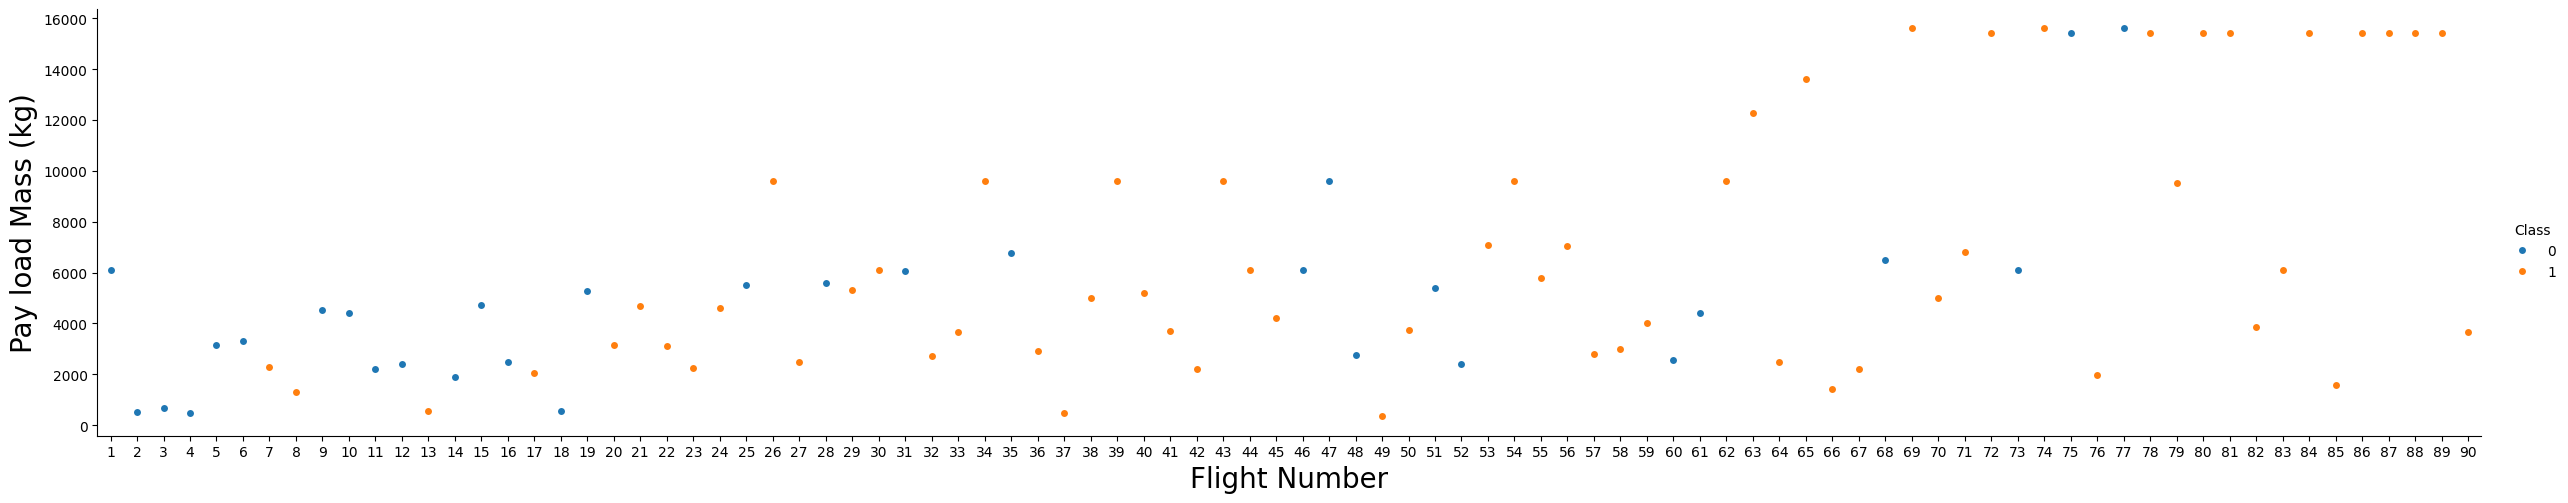

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

## TASK 1: Visualize the relationship between Flight Number and Launch Site

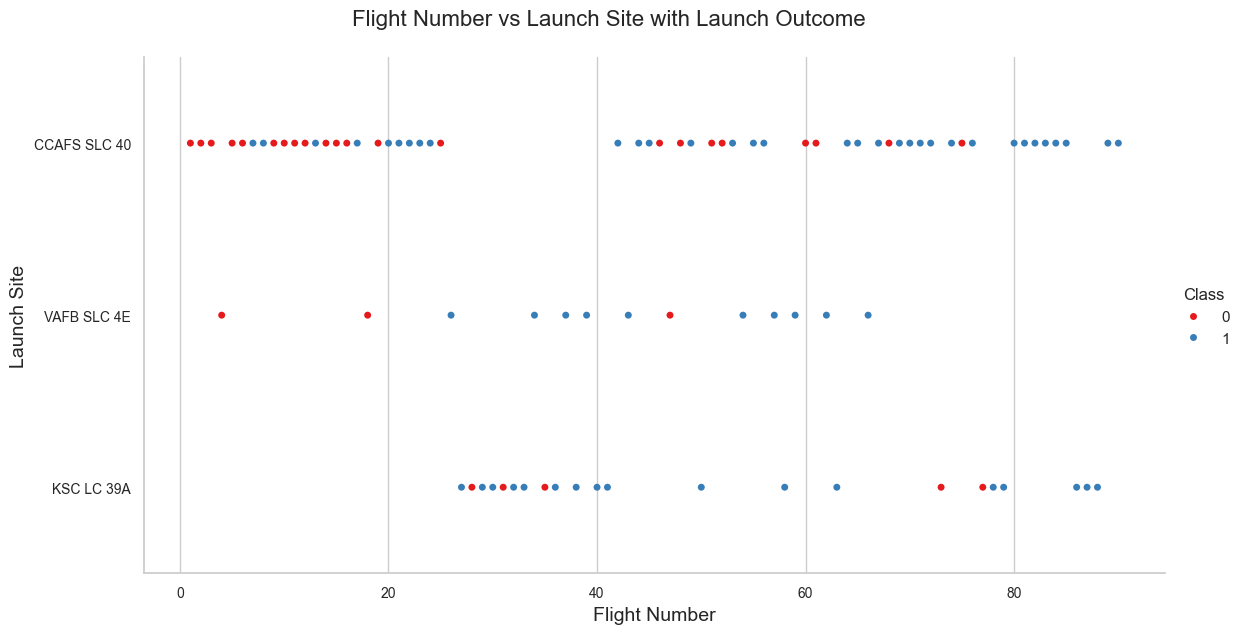

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style
sns.set(style="whitegrid")

# Create the catplot for FlightNumber vs LaunchSite
g = sns.catplot(
    data=df, 
    x="FlightNumber", 
    y="LaunchSite", 
    hue="Class",      # Use 'Class' as the hue to show the launch outcome
    kind="swarm",     # Plot a scatter-style swarm chart
    aspect=2,         # Aspect ratio for wider plots
    palette="Set1",   # Set color palette for better visualization
    height=6          # Set the plot height
)

# Add axis labels and title
g.set_axis_labels("Flight Number", "Launch Site", fontsize=14)
g.fig.suptitle("Flight Number vs Launch Site with Launch Outcome", fontsize=16, y=1.05)

# Adjust ticks for better readability
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Display the plot
plt.show()


## TASK 3: Visualize the relationship between success rate of each orbit type

C:\Users\solomon.mehari\AppData\Local\Temp\ipykernel_4400\2939865943.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


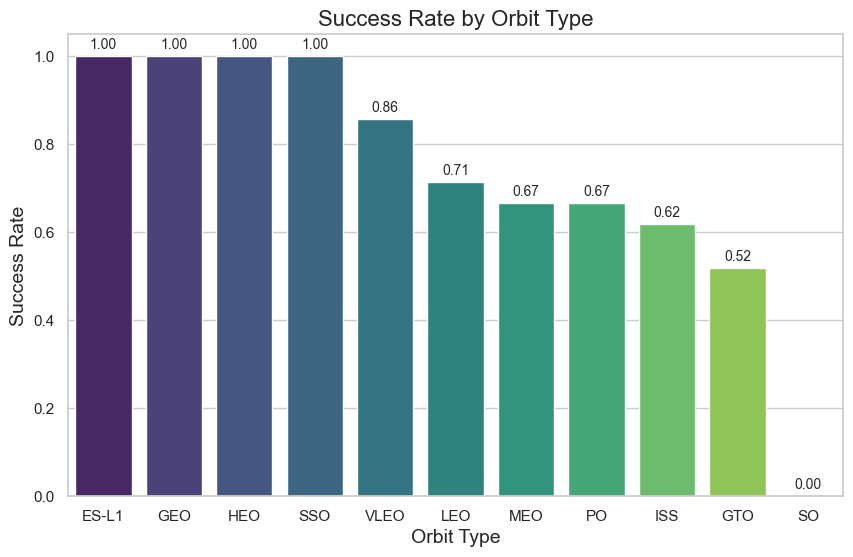

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by Orbit and calculate the mean success rate
success_rate_orbit = df.groupby("Orbit")["Class"].mean().reset_index()

# Sort the data for better visualization
success_rate_orbit = success_rate_orbit.sort_values(by="Class", ascending=False)

# Set Seaborn style
sns.set(style="whitegrid")

# Create a bar plot for success rates
plt.figure(figsize=(10, 6))
sns.barplot(
    data=success_rate_orbit,
    x="Orbit",
    y="Class",
    palette="viridis"  # A color palette for visual appeal
)

# Add axis labels and title
plt.title("Success Rate by Orbit Type", fontsize=16)
plt.xlabel("Orbit Type", fontsize=14)
plt.ylabel("Success Rate", fontsize=14)

# Add data labels on top of each bar
for index, row in enumerate(success_rate_orbit["Class"]):
    plt.text(index, row + 0.01, f"{row:.2f}", ha="center", va="bottom", fontsize=10)

# Show the plot
plt.show()


## TASK 4: Visualize the relationship between FlightNumber and Orbit type

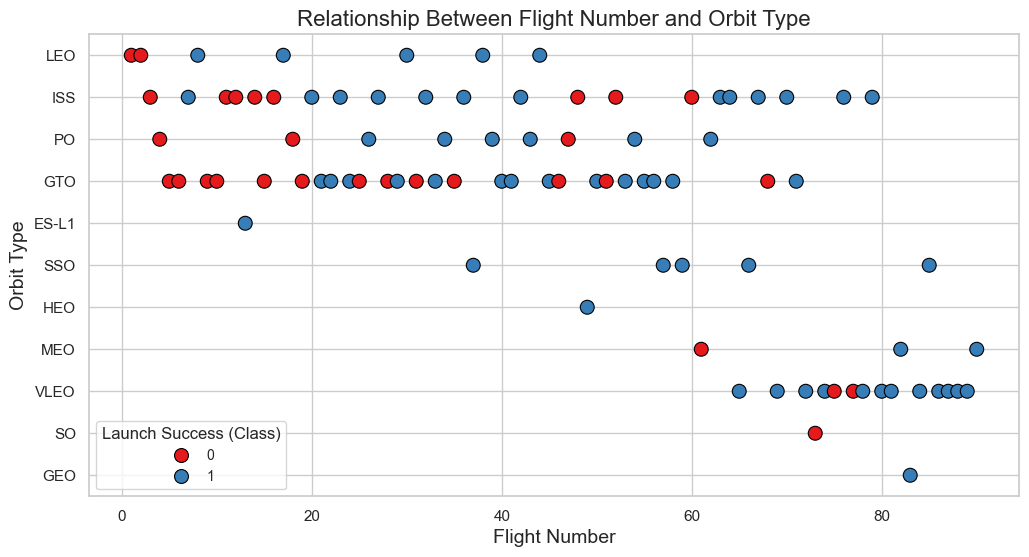

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style
sns.set(style="whitegrid")

# Create the scatter plot for FlightNumber vs Orbit
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df, 
    x="FlightNumber", 
    y="Orbit", 
    hue="Class",        # Hue indicates the success or failure of the launch
    palette="Set1",     # Color palette for better visualization
    s=100,              # Adjust the size of the scatter points
    edgecolor="black"   # Add a black edge around each point
)

# Add axis labels and title
plt.title("Relationship Between Flight Number and Orbit Type", fontsize=16)
plt.xlabel("Flight Number", fontsize=14)
plt.ylabel("Orbit Type", fontsize=14)

# Add a legend
plt.legend(title="Launch Success (Class)", loc="best", fontsize=10)

# Show the plot
plt.show()


## TASK 5: Visualize the relationship between Payload Mass and Orbit type

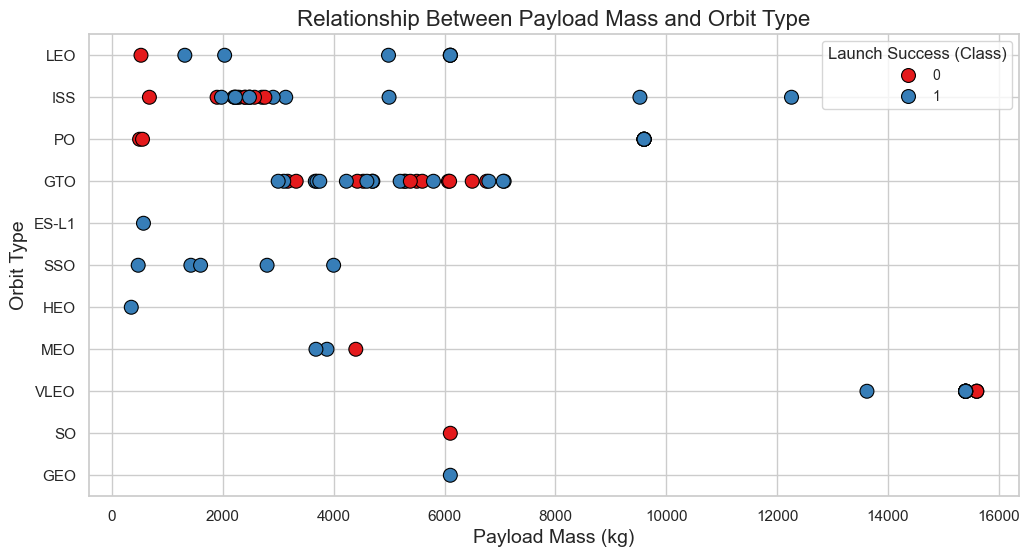

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style
sns.set(style="whitegrid")

# Create the scatter plot for PayloadMass vs Orbit
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df, 
    x="PayloadMass", 
    y="Orbit", 
    hue="Class",        # Hue indicates the success or failure of the launch
    palette="Set1",     # Color palette for better visualization
    s=100,              # Adjust the size of the scatter points
    edgecolor="black"   # Add a black edge around each point
)

# Add axis labels and title
plt.title("Relationship Between Payload Mass and Orbit Type", fontsize=16)
plt.xlabel("Payload Mass (kg)", fontsize=14)
plt.ylabel("Orbit Type", fontsize=14)

# Add a legend
plt.legend(title="Launch Success (Class)", loc="best", fontsize=10)

# Show the plot
plt.show()


## TASK 6: Visualize the launch success yearly trend

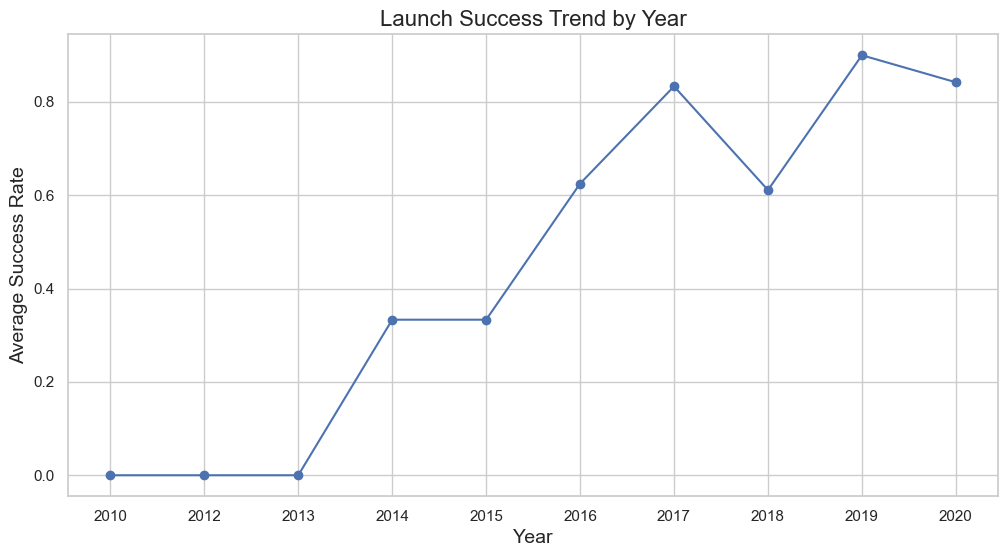

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# A function to Extract years from the Date
year = []
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year

# Extract year from Date column and assign to the DataFrame
df['Year'] = Extract_year()

# Group by 'Year' and calculate the average success rate ('Class')
yearly_success_rate = df.groupby('Year')['Class'].mean()

# Plotting the line chart
plt.figure(figsize=(12, 6))
plt.plot(yearly_success_rate.index, yearly_success_rate.values, marker='o', linestyle='-', color='b')

# Add axis labels and title
plt.title("Launch Success Trend by Year", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Average Success Rate", fontsize=14)

# Show the plot
plt.grid(True)
plt.show()


## Features Engineering

In [16]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


## TASK 7: Create dummy variables to categorical columns

In [18]:
# Create dummy variables for categorical columns using get_dummies
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])

# Display the first few rows of the transformed dataframe
features_one_hot.head()


,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


## TASK 8: Cast all numeric columns to float64

In [19]:
# Cast all columns in the dataframe to float64
features_one_hot = features_one_hot.astype('float64')

# Verify the changes by checking the data types
features_one_hot.dtypes


FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins        float64
Reused          float64
                 ...   
Serial_B1056    float64
Serial_B1058    float64
Serial_B1059    float64
Serial_B1060    float64
Serial_B1062    float64
Length: 80, dtype: object

We can now export it to a CSV for the next section

In [20]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)